In [64]:
# Importing required Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score
import sklearn.metrics as sm
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# Load in the data set

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
# Encoding Categorical Values 

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [71]:
# Scaling our data

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

scaled = pd.DataFrame(scaled, columns=df.columns, index=df.index)

scaled.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.000000,0.222222,0.625000,0.067797,0.041667,0.0
1,0.006711,0.166667,0.416667,0.067797,0.041667,0.0
2,0.013423,0.111111,0.500000,0.050847,0.041667,0.0
3,0.020134,0.083333,0.458333,0.084746,0.041667,0.0
4,0.026846,0.194444,0.666667,0.067797,0.041667,0.0


In [72]:
# Selecting 2 Features

X = df[['SepalLengthCm', 'PetalLengthCm']].values.reshape(-1,2) 

# Checking the shape of our X variable

X.shape

(150, 2)

### Creating 4 Dendrograms Based on Linkage and Distance

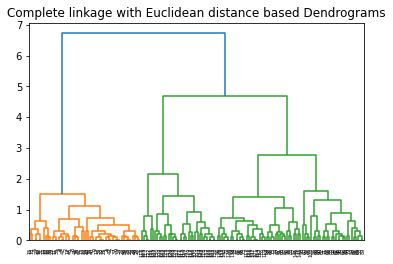

In [73]:
# Dendrogram with a complete Linkage

plt.title("Complete linkage with Euclidean distance based Dendrograms")  
dend = dendrogram(linkage(X, method='complete', metric='euclidean')) 

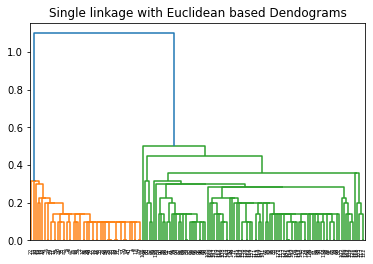

In [74]:
# Dendrogram with a Single Linkage

plt.title("Single linkage with Euclidean based Dendograms")  
dend = dendrogram(linkage(X, method='single', metric='euclidean')) 

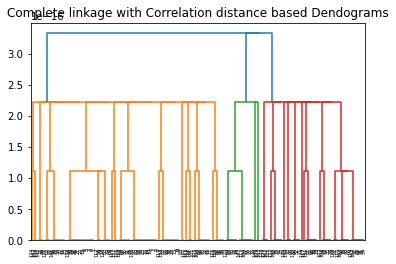

In [75]:
plt.title("Complete linkage with Correlation distance based Dendograms")  
dend = dendrogram(linkage(X, method='complete', metric='correlation')) 

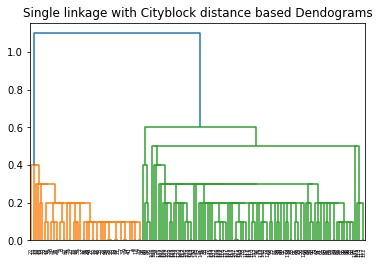

In [80]:
plt.title("Single linkage with Cityblock distance based Dendograms")  
dend = dendrogram(linkage(X, method='single', metric='cityblock'))

#### Dendrogram Selection

I will proceed for this task, using the Complete linkage with Euclidean Distance dendrogram.

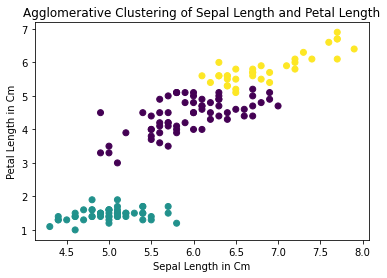

In [77]:
# Setting k = 3

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
plt.title('Agglomerative Clustering of Sepal Length and Petal Length')
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Petal Length in Cm')
plt.show()

In [78]:
# produce a Silhouette Score from our model

score = round(silhouette_score(X, cluster.labels_, metric='euclidean'),2)
print('Silhouette Score for our current model is:\n=',score)

Silhouette Score for our current model is:
= 0.58


Our silhouettee score gave a result of 0.58. The silhouette score range is based off of -1 to 1. 1 being the cluster are well defined and clearly distinguished. 0.58 lies on the upper end of the spectrum, closer to 1; which means that our chosen Agglomerative model seems to have clustered our data adequetely.